In [3]:
import plots
from matplotlib import pyplot as plt
import matplotlib 
import pandas as pd
import numpy as np

%load_ext autoreload
%autoreload 2

font_path = '/Users/philipp/Library/Fonts/LinLibertine_R.otf'
matplotlib.rcParams.update({
    'font.family': 'Linux Libertine O',
    'mathtext.fontset': 'custom',
    'mathtext.it': 'Linux Libertine O:italic',
    'mathtext.rm': 'Linux Libertine O'
})

## Global Performance

In [4]:
res_baran, failed_measurements = plots.get_mimir_result('measurements/runtime/baran-2024-04-24/')
res_baran = [{**r, 'ensemble': 'Baran'} for r in res_baran if not (r['dataset_group'] == 'OpenML' and 'cat' not in r['normalized_dataset'])]

res_mimir, failed_measurements = plots.get_mimir_result('measurements/global-performance/2024-04-27-mimir/')
res_mimir = [{**r, 'ensemble': 'Mimir'} for r in res_mimir]

Loaded Mimir Results. 0/81 measurements failed.
Loaded Mimir Results. 0/63 measurements failed.


In [5]:
df = pd.DataFrame([*res_mimir, *res_baran])
df_results = (pd.pivot((df.loc[:, ['normalized_dataset', 'dataset_group', 'ensemble', 'f1']]
            .groupby(['normalized_dataset', 'dataset_group', 'ensemble'])
            .agg({'f1': 'mean'})
            .reset_index()),
            columns='ensemble',
            index=['normalized_dataset', 'dataset_group'],
            values='f1')
            .round(2)
           )
df_results = df_results.loc[:, ['Mimir', 'Baran']]

In [6]:
df_results

,ensemble,Mimir,Baran
normalized_dataset,dataset_group,,
137 \n cat 5%,OpenML,0.92,0.65
1481 \n cat 5%,OpenML,1.00,1.00
151 \n cat 5%,OpenML,1.00,0.62
184 \n cat 5%,OpenML,1.00,1.00
41027 \n cat 5%,OpenML,0.82,0.67
43572 \n cat 5%,OpenML,0.90,0.30
6 \n cat 5%,OpenML,0.98,0.10
beers,Baran,0.96,0.92
bridges 1%,Renuver,1.00,0.86


In [7]:
df_results[df_results['Baran'] > df_results['Mimir']]

,ensemble,Mimir,Baran
normalized_dataset,dataset_group,,
flights,Baran,0.66,1.00
food,Baran,0.52,0.85
glass 1%,Renuver,0.82,0.87


In [8]:
df_results[df_results['Baran'] + 0.03 < df_results['Mimir']]

,ensemble,Mimir,Baran
normalized_dataset,dataset_group,,
137 \n cat 5%,OpenML,0.92,0.65
151 \n cat 5%,OpenML,1.00,0.62
41027 \n cat 5%,OpenML,0.82,0.67
43572 \n cat 5%,OpenML,0.90,0.30
6 \n cat 5%,OpenML,0.98,0.10
beers,Baran,0.96,0.92
bridges 1%,Renuver,1.00,0.86
bridges 3%,Renuver,0.89,0.78
cars 1%,Renuver,0.97,0.90


### Global Performance Boxplot

Mimir hat eine Messung auf `tax`, die auf Baran crasht.
Also sollte ich den Datensatz nicht reporten.

Danach haben beide Algorithmen die gleiche Anzahl an Messungen.

In [9]:
res_mimir_boxplots = [r for r in res_mimir if r['dataset'] != 'tax']
len([x for x in res_baran if x['dataset_group'] == 'Baran']) == len([x for x in res_mimir_boxplots if x['dataset_group'] == 'Baran'])

True

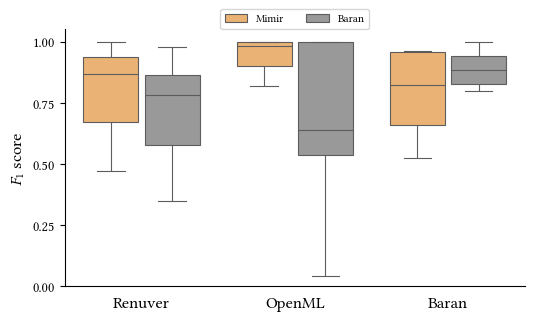

In [10]:
fig, ax, df = plots.plot_mimir_vs_baran(res_baran, res_mimir_boxplots)
plt.savefig('./img/2024-04-28-global-performance.pdf', bbox_inches='tight')

In [11]:
df.loc[:, ['dataset_group', 'ensemble', 'F1 Score']].groupby(['ensemble', 'dataset_group']).agg({'F1 Score': ['mean', 'std']})

F1 Score          
                            mean       std
ensemble dataset_group                    
Baran    Baran          0.810728  0.229715
         OpenML         0.619927  0.325227
         Renuver        0.729424  0.189479
Mimir    Baran          0.784483  0.177173
         OpenML         0.945714  0.067570
         Renuver        0.804251  0.170931

In [12]:
df_ensemble = df.loc[:, ['ensemble', 'F1 Score']].groupby(['ensemble']).agg({'F1 Score': ['mean', 'std']})

In [13]:
mimir_f1 = df_ensemble['F1 Score'][df_ensemble['F1 Score'].index == 'Mimir']['mean'][0]
baran_f1 = df_ensemble['F1 Score'][df_ensemble['F1 Score'].index == 'Baran']['mean'][0]

imp = round((mimir_f1 - baran_f1)/baran_f1, 3) * 100

print(f'Mimir achieves an improvment of {imp}% relative to Baran in F1 correction score across all datasets.')
print(f'Mimir achieves an average correction F1-Score of {round(mimir_f1*100, 1)}%, Baran {round(baran_f1*100, 1)}%. Mimir is {round((mimir_f1 - baran_f1)*100, 1)}% better.')

Mimir achieves an improvment of 19.3% relative to Baran in F1 correction score across all datasets.
Mimir achieves an average correction F1-Score of 84.9%, Baran 71.1%. Mimir is 13.7% better.


## Ablation Barcharts

Loaded Ablation Study. 0/567 measurements failed.


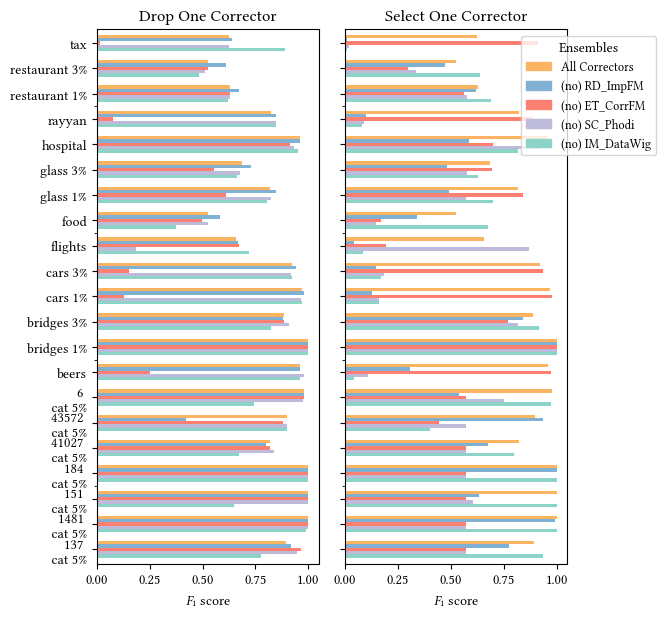

In [14]:
fig, axes, failed = plots.plot_global_ablation_study('measurements/ablation-study/2024-04-27/')
#plt.savefig('./img/2024-04-28-global-ablation-study.pdf', bbox_inches='tight')
plt.savefig('./img/2024-04-28-global-ablation-study.png', bbox_inches='tight')

## Ablation Scatter

Loaded Mimir Results. 0/567 measurements failed.


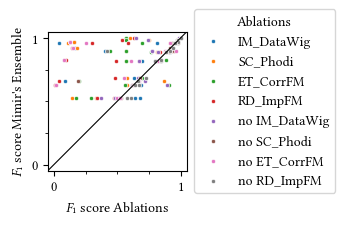

In [15]:
fig, axes, failed_measurements = plots.ablation_scatter('measurements/ablation-study/2024-04-27/')
plt.savefig('./img/2024-04-28-global-ablation-study-scatter.png', bbox_inches='tight')
plt.show()

## Local Ablation Barchart

Loaded Ablation Study. 0/567 measurements failed.


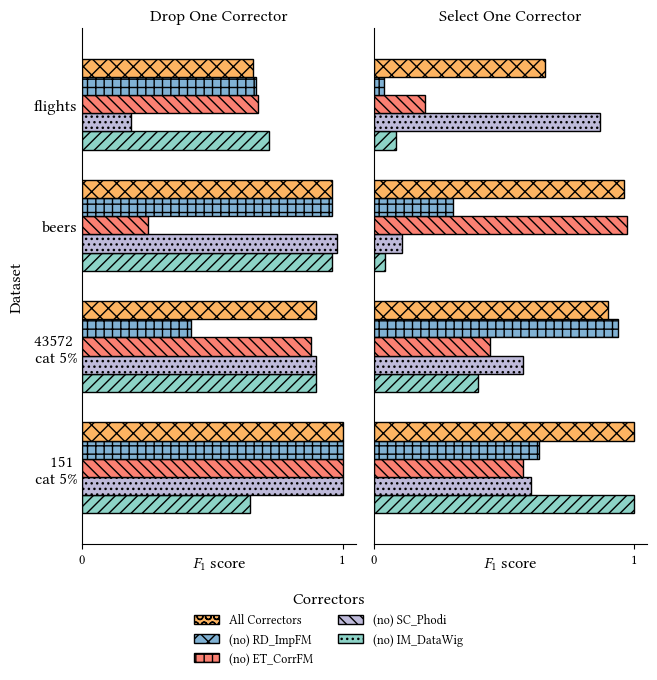

In [45]:
fig, axes, failed = plots.plot_local_ablation_study('measurements/ablation-study/2024-04-27/')
plt.savefig('./img/2024-04-28-local-ablation-study.pdf', bbox_inches='tight')
plt.tight_layout()
plt.show()

## Joint Ablation Chart

Loaded Ablation Study. 0/567 measurements failed.
Loaded Mimir Results. 0/567 measurements failed.
Loaded Mimir Results. 0/126 measurements failed.
Loaded Mimir Results. 0/63 measurements failed.


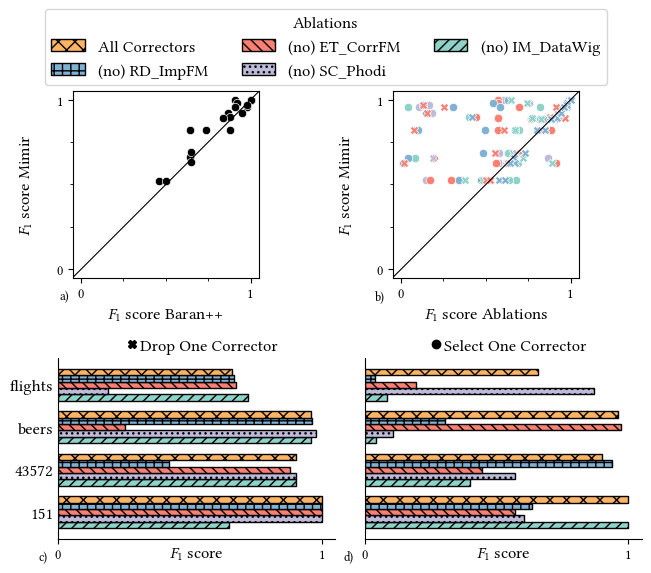

In [194]:
fig, axes, failed, df_scatter = plots.plot_joint_ablation('measurements/ablation-study/2024-04-27/', 'measurements/runtime/2024-04-15-baranpp/', 'measurements/global-performance/2024-04-27-mimir/')
plt.savefig('./img/2024-04-28-merged-ablation-study.pdf', bbox_inches='tight')

## ET_CorrFM vs Value Models

Loaded Mimir Results. 0/252 measurements failed.


/Users/philipp/code/experimente/2024W17-pvldb-final-results/plots.py:887: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2].set_ylabel('')


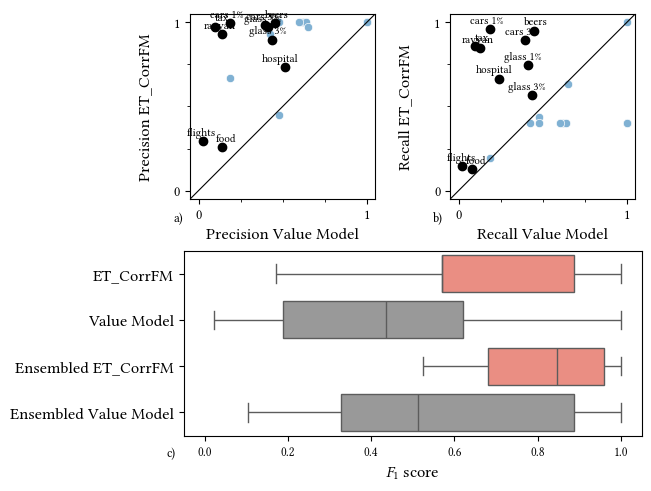

In [155]:
fig, axes, df_scatter = plots.et_corrfm_vs_value_model_v2('measurements/corrfm-vs-value/2024-04-28/')
plt.savefig('./img/2024-04-28-scatter-et_corrfm-vs-value_model.pdf', bbox_inches='tight')

Phodi vs Vicinity Models

Loaded Mimir Results. 0/219 measurements failed.


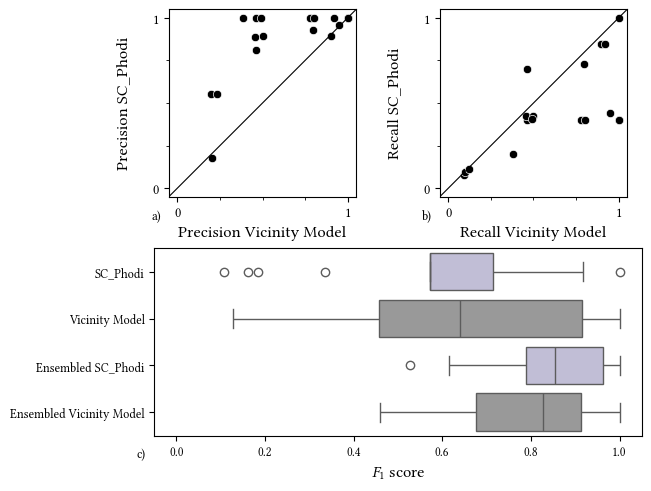

In [156]:
fig, axes, failed = plots.sc_phodi_vs_vicinity_model('measurements/phodi-vs-vicinity/2024-04-28-no-tax-food/')
plt.savefig('./img/2024-04-28-phodi-vs-vicinity.pdf', bbox_inches='tight')

## Runtime

Loaded Mimir Results. 0/63 measurements failed.
Loaded Mimir Results. 0/81 measurements failed.
Loaded Mimir Results. 0/129 measurements failed.


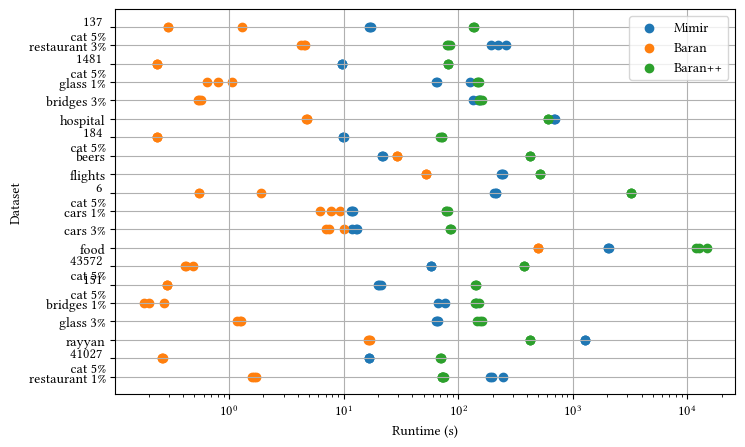

In [61]:
res_mimir_runtime, failed_measurements = plots.get_mimir_result('measurements/runtime/mimir-2024-04-28/')
res_baran_runtime, failed_measurements = plots.get_mimir_result('measurements/runtime/baran-2024-04-24/')
res_baranpp_runtime, failed_measurements = plots.get_mimir_result('measurements/runtime/baranpp/2024-04-15-baranpp/')

res_mimir_runtime = [r for r in res_mimir_runtime if r['dataset'] != 'tax' and not (r['dataset_group'] == 'OpenML' and 'cat' not in r['normalized_dataset'])]
res_baran_runtime = [r for r in res_baran_runtime if not (r['dataset_group'] == 'OpenML' and 'cat' not in r['normalized_dataset'])]
res_baranpp_runtime = [r for r in res_baranpp_runtime if r['dataset'] != 'tax' and not (r['dataset_group'] == 'OpenML' and 'cat' not in r['normalized_dataset'])]

# Increase the figure size
plt.figure(figsize=(8, 5))  # Adjust width and height as needed

plt.scatter([r['runtime'] for r in res_mimir_runtime], [r['normalized_dataset'] for r in res_mimir_runtime], label='Mimir')
plt.scatter([r['runtime'] for r in res_baran_runtime], [r['normalized_dataset'] for r in res_baran_runtime], label='Baran')
plt.scatter([r['runtime'] for r in res_baranpp_runtime], [r['normalized_dataset'] for r in res_baranpp_runtime], label='Baran++')

#plt.xticks(rotation=)  # Rotate x-axis labels by 45 degrees

plt.ylabel('Dataset')
plt.xlabel('Runtime (s)')
plt.xscale('log')  # Set x-axis scale to logarithmic
plt.legend()
plt.grid(True)
plt.show()

In [65]:
mimir_runtimes = [r['runtime'] for r in res_mimir_runtime]
baran_runtimes = [r['runtime'] for r in res_baran_runtime]
baranpp_runtimes = [r['runtime'] for r in res_baranpp_runtime]

In [66]:
# Calculate quantiles using numpy
quantiles_mimir = np.percentile(mimir_runtimes, [25, 50, 75])
quantiles_baran = np.percentile(baran_runtimes, [25, 50, 75])
quantiles_baranpp = np.percentile(baranpp_runtimes, [25, 50, 75])

print(f"Average Mimir {round(np.mean(mimir_runtimes), 2)} Baran {round(np.mean(baran_runtimes),2)} Baran++ {round(np.mean(baranpp_runtimes),2)}")
print(f"25th percentile (Q1) Mimir {round(quantiles_mimir[0], 2)}, Baran {round(quantiles_baran[0], 2)} Baran++ {round(np.mean(quantiles_baranpp[0]),2)}")
print(f"25th percentile (Q2/median) Mimir {round(quantiles_mimir[1],2)}, Baran {round(quantiles_baran[1],2)} Baran++ {round(np.mean(quantiles_baranpp[1]),2)}")
print(f"25th percentile (Q3) Mimir {round(quantiles_mimir[2],2)}, Baran {round(quantiles_baran[2],2)} Baran++ {round(np.mean(quantiles_baranpp[2]),2)}")

Average Mimir 275.17 Baran 31.41 Baran++ 966.39
25th percentile (Q1) Mimir 16.72, Baran 0.29 Baran++ 81.52
25th percentile (Q2/median) Mimir 65.59, Baran 1.26 Baran++ 142.53
25th percentile (Q3) Mimir 216.28, Baran 7.55 Baran++ 424.68
